Olivia Nguyen

# DA 210 -- Spring 2025 -- Homework 2.2 -- Professor Lavin

## Directions 

This assignment is a little bit different from the others.

1. Begin by creating a new repository under your account on Github.com. Name the repo `da-210-spring-2025-h-2.2` and select the option to add a `README.md` to the project.
2. You can make the repo public or keep it private and add me as a collaborator (username `mjlavin80`)
3. Clone the repository to your computer
4. Working locally, set up your project with: copies of all GSS data files from H-2 and a Jupyter Notebook file called `h-2.2.ipynb`   
5. Copy/paste the "Load Data" block and questions 1-4 below to your `h-2.2.ipynb` file. Make sure each question is in a separate markdown cell.
6. Below each question, input your response in either a code cell or a markdown cell
7. When you are finished, save your work, convert the Jupytext Notebook to .html format, and submit the `h-2.2.html` file on Canvas.
8. Push your updated `da-210-spring-2025-h-2.2` repo to Github.com.

__Reminders:__ 

- You are not permitted to get the answers from a classmate or to use Github Copilot, chatGPT, etc. on this homework. These exercises are for practice so, if you use outside help in a way that's not permitted, you are only cheating yourself out of a chance to learn and prepare for future quizzes and tests. 
- Working with an ARC tutor and visiting our TA's office hours are both permitted, but they should be provide advice and support, and you should not expect them to do your work for you.

## Load Data

Copy/paste the following code block to your live Notebook and make sure it runs without error:

In [69]:
import pandas as pd 

# load sample csv
df_gss_sample = pd.read_csv('data/gss_sample.csv', index_col=0, low_memory=False, encoding='utf8') 

# load rows counts of full data
gss_full_row_counts = pd.read_csv('data/gss_full_row_counts.csv', index_col=0, low_memory=False, encoding='utf8')

# load years per variable data
gss_years_per_var = pd.read_csv('meta/gss_data_years_per_var.csv', index_col=0, low_memory=False, encoding='utf8')

# load data dictionary
gss_data_dictionary =  pd.read_csv('meta/gss_data_dictionary.csv', index_col=0, low_memory=False, encoding='latin1')

## Question 1

1. Working with `df_gss_sample`, create a variable called `mycols` that is a list of ten (10) column names that are related to one another in some way.
2. Create a new variable called `df_gss_sample_ten_cols` that contains only the ten (10) columns in `mycols`.
3. In a markdown cell below this question, explain how your variables are related to one another.

__Hint__: to find related variables, look at the variable names, the 'var_doc_label' column in `gss_data_dictionary` and/or the GSS Data Explorer at https://gssdataexplorer.norc.org/.

In [72]:
mycols = ['age', 'sex', 'educ', 'conrinc', 'sibs', 'family16', 'happy', 'socfrend', 'childs', 'wrkstat']
df_gss_sample_ten_cols = df_gss_sample[mycols]
df_gss_sample_ten_cols.head(10)

,age,sex,educ,conrinc,sibs,family16,happy,socfrend,childs,wrkstat
1247,68.0,2.0,12.0,NaN,6.0,7.0,1.0,NaN,3.0,5.0
31037,33.0,2.0,14.0,16137.0,4.0,1.0,1.0,5.0,1.0,1.0
50404,38.0,1.0,11.0,NaN,NaN,NaN,NaN,NaN,3.0,7.0
34084,77.0,2.0,13.0,NaN,5.0,1.0,2.0,4.0,2.0,7.0
38488,26.0,1.0,16.0,24543.0,1.0,1.0,2.0,NaN,0.0,1.0
24889,26.0,1.0,18.0,33221.0,2.0,4.0,3.0,2.0,1.0,1.0
22793,40.0,2.0,16.0,NaN,2.0,1.0,1.0,NaN,3.0,7.0
64359,43.0,2.0,8.0,NaN,4.0,5.0,2.0,2.0,4.0,4.0
30582,43.0,1.0,16.0,32273.0,1.0,5.0,1.0,3.0,3.0,1.0
66423,73.0,2.0,14.0,NaN,1.0,1.0,1.0,7.0,3.0,5.0


10 variables I choose are closely related. `age`, and `sex` identify the respondent’s age and gender, where 01 represents male and 02 represents female. Then, we can know their highest year of school completed when look at `educ`, which can influence personal income `conrinc` and how many working hours `wrkstat`. Work hours may impact social life, can they spend evening with friends `socfrend`, and how `happy` they are. We also look closer to their family. Whether they live with their parents when 16 years old `family 16`, how many siblings they have `sibs`, and their number of children `childs`.  

## Question 2

In a markdown cell below this question, address the following:

- How does `gss_sample` relate to `gss_full_row_counts`? If we assume `gss_sample` is a sample of a larger dataset of GSS data, why would we want some information about the full rows counts from the dataset? 
- Generally speaking, what information is contained in the `gss_years_per_var` and `gss_data_dictionary` DataFrames? How can we use these sources to better understand our sample?

1. gss_sample is a dataset containing information of samples, incluiding years, id, and so on. However, a year can have multiple rows (multiple information entries), hence the gss_full_row_counts examines how many full rows (rows with no missing value) a year have from the previous dataset. This help us understands the amount of data the gss_sample dataframe is having - such as seeing if there is unbalanced amount of data or not, or what years we can analyze.
   
3. Metadata information is contained in gss_years_per_var and gss_data_dictionary dataframes. gss_years_per_var provides information if we can expect having entries in that row or not, while gss_data_dictionary is an explanation of variables the gss_sample dataframe contains, with their labels, number of missing values, and more. These sources allow us to understand meanings of columns, if there is any missing values or not, also types of variables, which guides us when doing analysis.

## Question 3

In a code cell below this question, use the `value_counts` method to display a count for each unique value found in the `zodiac` column of `df_gss_sample`. __Display the result as a `DataFrame`__.

In [76]:
zodiac_counts = df_gss_sample['zodiac'].value_counts()
zodiac_counts_df = zodiac_counts.reset_index()
zodiac_counts_df.columns = ['zodiac', 'count']

print(zodiac_counts_df)

    zodiac  count
0      6.0    297
1      5.0    288
2     12.0    285
3      2.0    281
4     11.0    273
5      7.0    266
6      4.0    261
7     10.0    256
8      8.0    248
9      1.0    238
10     9.0    237
11     3.0    236


## Question 4

In a code cell below this question, display a scatter plot depicting the `realinc` variable on one axis and the respondents occupational prestige score based on the 2010 Census occupation classification. 

__Hint:__ Pandas has some simple plotting options built into it, and the Seaborn library is designed to accept a pandas DataFrame as an input, sort of like (but not as good as) ggplot in R. Here are some resources on Pandas and Seaborn plots:

- Built-in plots: https://pandas.pydata.org/docs/user_guide/10min.html#plotting
- Seaborn scatter plot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

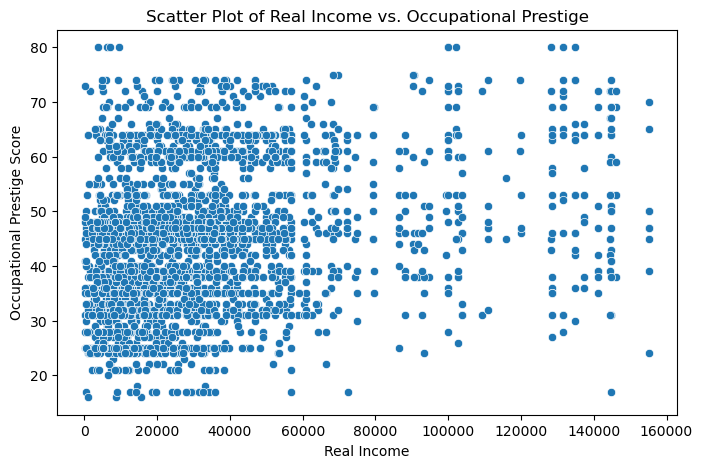

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_gss_sample, x='realinc', y='prestg10')

# Add labels and title
plt.xlabel('Real Income')
plt.ylabel('Occupational Prestige Score')
plt.title('Scatter Plot of Real Income vs. Occupational Prestige')

# Display the plot
plt.show()